# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Daffon, David D. \
_Student No._: 2021-04594 \
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** 

I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

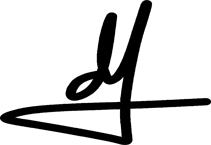

In [20]:
from IPython.display import Image #run cell to display e-sig
Image(filename="sig.png")

**DAVID D. DAFFON**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

**I skip this step since I load the .npz file locally**

In [21]:
import os 
import sys

cur_path = os.path.abspath(os.path.join(''))
if cur_path not in sys.path:
    sys.path.append(cur_path)

In [22]:
import numpy as np

data = np.load('spec4000_corrected.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [23]:
data.files

['spec_recons', 'wavelength']

In [24]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [25]:
# preliminaries: importing the libraries I need
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing as pp

Text(0.5, 1.0, 'Sample SDSS spectra')

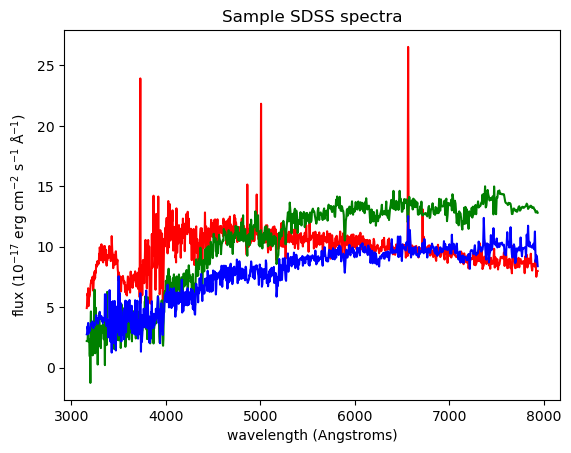

In [26]:
wavelength = data['wavelength'] # this code is given
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'r-')
plt.plot(wavelength, flux1, 'g-')
plt.plot(wavelength, flux2, 'b-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

### Author's note 1

We get a .npz file containing two arrays of shape (4000, 1000), and (1000,) respectively. The 4000-len array contains spectra with 1000 attributes, meaning that there are 1000 unique descriptors of each of these 4000 spectra. It is apparent that casting this as a DataFrame and operating shall be incredibly tedious. Hence, we implement principal component analysis to reduce the dimensions of our data and find a way to work with it.

We normalize the data to further simplify it since that allows us to make our data unitless.

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


Text(0.5, 1.0, 'Normalized mean spectrum with standard dev')

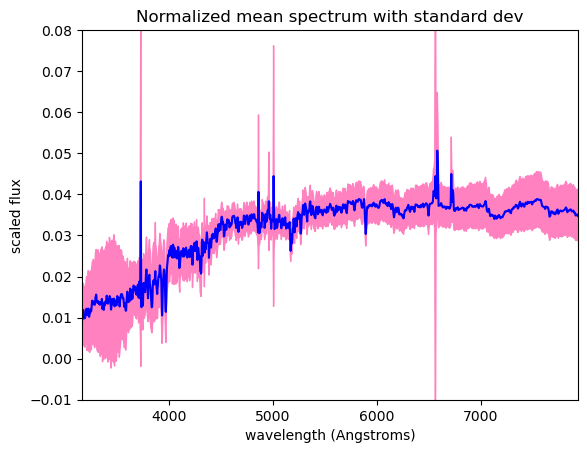

In [27]:
x = data['spec_recons'] # storing the 'spec_recons' file in the data as the object x
x = pp.normalize(x) # performing normalization

mu = x.mean(0) # take the mean
std = x.std(0) # take the standard deviation

plt.plot(wavelength, mu, color='#0000ff') # plotting
plt.fill_between(wavelength, mu - std, mu + std, color='#FF81C0')
plt.xlim(np.min(wavelength), np.max(wavelength))
plt.ylim(-0.01, 0.08)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('scaled flux')
plt.title('Normalized mean spectrum with standard dev')

### Author's note 2

In the plot above, we are able to simplify our data and express the substantial 1000-attribute 4000-count spectra inputs into a single plot by normalizing and taking the mean and stdev. Now that we have simplified it this way, we can examine it with PCA.

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


In [28]:
from sklearn.decomposition import PCA # import PCA from sklearn
pca = PCA(n_components=4) # create PCA object and store as 'pca'

x_proj = pca.fit_transform(x) # fit pca on var x and store as var x_proj
x_proj.shape # inspect shape of x_proj if consistent

(4000, 4)

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

(-0.75, 1.25)

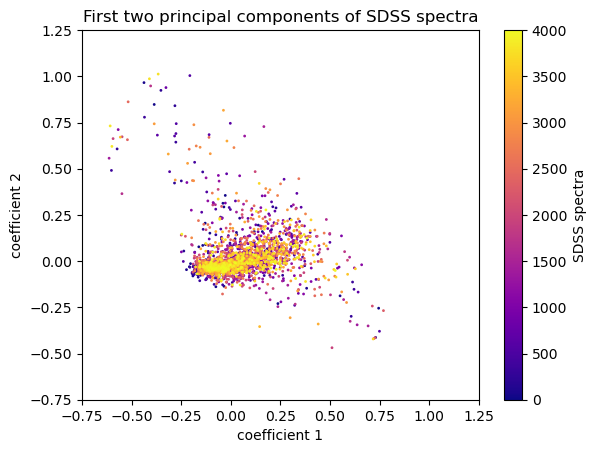

In [29]:
plt.scatter(x_proj[:, 0], x_proj[:, 1], c=np.arange(0, 4000), s=4, lw=0, cmap='plasma') # we use list indexing to plot the two coefficients, cmap plasma is used
plt.colorbar(label='SDSS spectra') # plotting
plt.clim(0, 4000)
plt.xlabel('coefficient 1')
plt.ylabel('coefficient 2')
plt.title('First two principal components of SDSS spectra')
plt.xlim(-0.75, 1.25)
plt.ylim(-0.75, 1.25)

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

Text(0.5, 1.0, 'Mean Spectrum and Eigen-spectra')

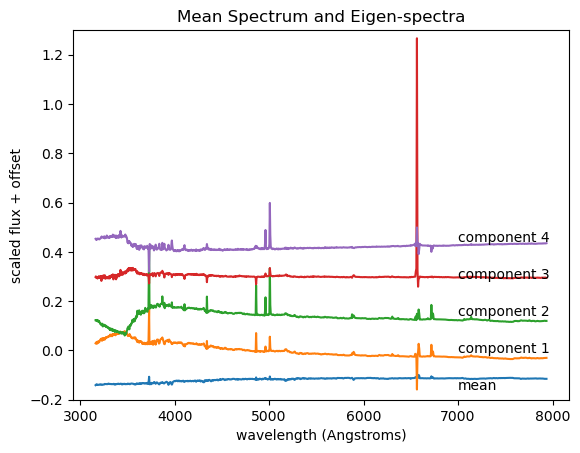

In [30]:
j = np.arange(4000) # plot mean
plt.plot(wavelength, pca.mean_ - 0.15)
plt.text(7000, -0.16, "mean" % j)

for i in range(4): # plot components with for loop for efficiency
    plt.plot(wavelength, pca.components_[i] + 0.15 * i)
    plt.text(7000, -0.01 + 0.15 * i, "component %i" % (i + 1), )

plt.ylim(-0.2, 1.3) # plotting
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('scaled flux + offset')
plt.title('Mean Spectrum and Eigen-spectra')

### Author's note 3

We produce a scatterplot the first two principal components of our spectra. We see how difficult it is to understand said scatterplot as a human due to the complex-dimensionality of the data. However, after performing PCA, we reduce the dimensionality and express the 2-dimensional scatterplot into 1-dimensional lines which correspond to components, with the jumps indicating their distance or "offset" from the mean. This way we are able to make the data more compact and analyzable.

## Further exploration

I am interested in using randomized PCA, so we toggle the svd_solver arg in PCA to 'randomized' to accommodate this. Furthemore, I am also interested in extending the number of components in our PCA to determine if any changes arise.

In [31]:
from sklearn.decomposition import PCA
rpca = PCA(n_components=6, svd_solver='randomized') # implementing randomized PCA
x_proj2 = rpca.fit_transform(x) 
x_proj2.shape

(4000, 6)

Text(0.5, 1.0, 'Mean spectrum and eigen-spectra')

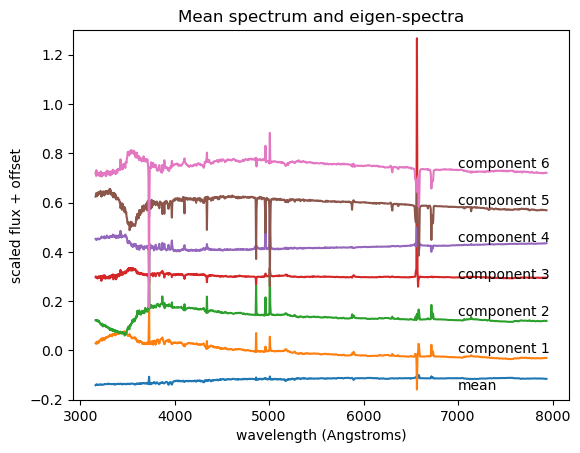

In [32]:
j = np.arange(4000)
plt.plot(wavelength, rpca.mean_ - 0.15)
plt.text(7000, -0.16, "mean" % j)

for i in range(6):
    plt.plot(wavelength, rpca.components_[i] + 0.15 * i)
    plt.text(7000, -0.01 + 0.15 * i, "component %i" % (i + 1), )

plt.ylim(-0.2, 1.3)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('scaled flux + offset')
plt.title('Mean spectrum and eigen-spectra')

### Author's note 4

Utilizing randomized PCA did not seem to create any changes in the process and in the respective plots, but extending the components created two more lines on eigen-spectra plot.

*Reference: scikits learn 2.3.6 Dimensionality Reduction of Astronomical Spectra*